In [ ]:
#### import torch
print(torch.__version__)
import pandas as pd
import allennlp
import matplotlib
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("/Users/wenjunshi/Desktop/SMSspamCollection.txt",delimiter='\t',names=["Label","Text"])
#print(data)
columns={0:"label", 1:"text"}
data = data.rename(columns).drop_duplicates()
#print(data)

#data['label'] = '__label__' + data['label'].astype(str)
data.set_index("Label", inplace=True)
ham = data.loc['ham',:]
spam = data.loc['spam',:]
#print(ham)
#print(spam)
ham_train = ham.iloc[0:int(len(ham)*0.8)]
ham_test = ham.iloc[int(len(ham)*0.8):int(len(ham)*0.9)]
ham_dev = ham.iloc[int(len(ham)*0.9):]

spam_train = spam.iloc[0:int(len(spam)*0.8)]
spam_test = spam.iloc[int(len(spam)*0.8):int(len(spam)*0.9)]
spam_dev = spam.iloc[int(len(spam)*0.9):]
train = spam_train.append(ham_train)
test = spam_test.append(ham_test)
dev = spam_dev.append(ham_dev)

#print(train)
train.to_csv('train.csv')
test.to_csv('test.csv')
dev.to_csv('dev.csv')
pd.read_csv('train.csv')
#pd.read_csv('test.csv')
#pd.read_csv('dev.csv')

#data.iloc[0:int(len(data)*0.8)].to_csv('train.csv', sep='\t', index = False, header = False)
#data.iloc[int(len(data)*0.8):int(len(data)*0.9)].to_csv('test.csv', sep='\t', index = False, header = False)
#data.iloc[int(len(data)*0.9):].to_csv('dev.csv', sep='\t', index = False, header = False)


,Label,Text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
4129,ham,So what did the bank say about the money?
4130,ham,Aiyar dun disturb u liao... Thk u have lots 2 ...
4131,ham,Hey they r not watching movie tonight so i'll ...
4132,ham,Yar lor... How u noe? U used dat route too?


In [36]:
#from flair.data_fetcher import NLPTaskDataFetcher   not using anymore
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus

In [37]:
Corpus = CSVClassificationCorpus(data_folder = Path('/Users/wenjunshi/Data'),
                                     column_name_map = columns,skip_header=True)
#print(Path('/Users/wenjunshi/Desktop/SMSspamCollection.txt').exists())
#use Path object for specifying corpus folder
word_embeddings = [WordEmbeddings('glove'), 
FlairEmbeddings('news-forward-fast'), FlairEmbeddings('news-backward-fast')]

2019-10-17 12:54:27,616 Reading data from /Users/wenjunshi/Data
2019-10-17 12:54:27,617 Train: /Users/wenjunshi/Data/train.csv
2019-10-17 12:54:27,618 Dev: /Users/wenjunshi/Data/dev.csv
2019-10-17 12:54:27,620 Test: /Users/wenjunshi/Data/test.csv


In [38]:
document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=512, 
reproject_words=True, reproject_words_dimension=256)

In [40]:
classifier = TextClassifier(document_embeddings, 
label_dictionary=Corpus.make_label_dictionary(), multi_label=False)

2019-10-17 12:55:10,702 Computing label dictionary. Progress:


100%|██████████| 4134/4134 [00:01<00:00, 2814.85it/s]

2019-10-17 12:55:12,427 [b'spam', b'ham']


In [42]:
trainer = ModelTrainer(classifier, Corpus)
trainer.train('./', max_epochs=10)

2019-10-17 12:55:55,406 ----------------------------------------------------------------------------------------------------
2019-10-17 12:55:55,410 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2148, out_features=256, bias=True)
    (rnn): GRU(256, 512)
  

/anaconda3/envs/ML/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DocumentRNNEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/anaconda3/envs/ML/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/anaconda3/envs/ML/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/anaconda3/envs/ML/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type FlairEmbeddings. It won't be checked for correctness upon loading.
  "type "

2019-10-17 13:01:38,009 ----------------------------------------------------------------------------------------------------
2019-10-17 13:01:39,756 epoch 2 - iter 0/130 - loss 0.04966607 - samples/sec: 252.08
2019-10-17 13:02:10,302 epoch 2 - iter 13/130 - loss 0.06870540 - samples/sec: 13.65
2019-10-17 13:02:33,789 epoch 2 - iter 26/130 - loss 0.08408228 - samples/sec: 17.77
2019-10-17 13:03:08,628 epoch 2 - iter 39/130 - loss 0.06987016 - samples/sec: 12.12
2019-10-17 13:03:42,071 epoch 2 - iter 52/130 - loss 0.09398715 - samples/sec: 12.46
2019-10-17 13:04:16,295 epoch 2 - iter 65/130 - loss 0.09088025 - samples/sec: 12.17
2019-10-17 13:04:45,022 epoch 2 - iter 78/130 - loss 0.08577816 - samples/sec: 14.52
2019-10-17 13:05:27,277 epoch 2 - iter 91/130 - loss 0.08244418 - samples/sec: 9.86
2019-10-17 13:06:00,759 epoch 2 - iter 104/130 - loss 0.08190083 - samples/sec: 12.45
2019-10-17 13:06:30,684 epoch 2 - iter 117/130 - loss 0.07834201 - samples/sec: 13.93
2019-10-17 13:06:57,107 

2019-10-17 16:37:02,411 epoch 8 - iter 52/130 - loss 0.04174120 - samples/sec: 1.84
2019-10-17 16:39:13,881 epoch 8 - iter 65/130 - loss 0.03789554 - samples/sec: 3.22
2019-10-17 16:39:39,561 epoch 8 - iter 78/130 - loss 0.03449322 - samples/sec: 16.24
2019-10-17 16:40:09,066 epoch 8 - iter 91/130 - loss 0.03356257 - samples/sec: 14.13
2019-10-17 16:40:34,174 epoch 8 - iter 104/130 - loss 0.03337505 - samples/sec: 16.62
2019-10-17 16:41:06,585 epoch 8 - iter 117/130 - loss 0.03462930 - samples/sec: 12.86
2019-10-17 16:41:35,582 ----------------------------------------------------------------------------------------------------
2019-10-17 16:41:35,585 EPOCH 8 done: loss 0.0338 - lr 0.0500
2019-10-17 16:42:09,101 DEV : loss 0.04506611451506615 - score 0.9884
2019-10-17 16:42:09,365 BAD EPOCHS (no improvement): 1
2019-10-17 16:42:09,368 ----------------------------------------------------------------------------------------------------
2019-10-17 16:42:11,532 epoch 9 - iter 0/130 - loss 0

{'test_score': 0.9807,
 'dev_score_history': [0.9826,
  0.9884,
  0.9903,
  0.9903,
  0.9884,
  0.9865,
  0.9865,
  0.9884,
  0.9865,
  0.9865],
 'train_loss_history': [0.14926739762573002,
  0.07794269324602703,
  0.07022829292377887,
  0.056039371226842584,
  0.049778231119181816,
  0.047850781711839284,
  0.03864491950863829,
  0.03377292320320311,
  0.030480002148229126,
  0.028807833095869192],
 'dev_loss_history': [tensor(0.0622),
  tensor(0.0472),
  tensor(0.0490),
  tensor(0.0459),
  tensor(0.0518),
  tensor(0.0488),
  tensor(0.0467),
  tensor(0.0451),
  tensor(0.0505),
  tensor(0.0471)]}

In [44]:
#loss-epochs graph 

from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load_from_file('./best-model.pt')
# sentence = data['text'].tolist()
sent = ["FREE entry into our £250 weekly comp just \
        send the word WIN to 80086 NOW. 18 T&C www.txttowin.co.uk"]
sentence = Sentence(sent)
classifier.predict(sentence)
# print(sentence.labels)
label = str(sentence.labels[0]).split()[0]
print(f"{label}\t{sentence}")

AttributeError: type object 'TextClassifier' has no attribute 'load_from_file'

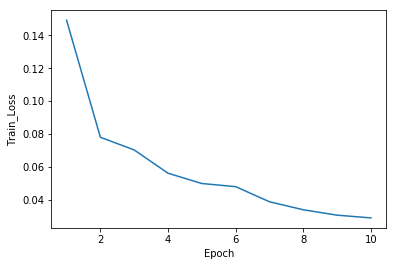

In [11]:
#evaluation 
train_loss= [0.14926739762573002,
  0.07794269324602703,
  0.07022829292377887,
  0.056039371226842584,
  0.049778231119181816,
  0.047850781711839284,
  0.03864491950863829,
  0.03377292320320311,
  0.030480002148229126,
  0.028807833095869192]
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(epoch, train_loss)
plt.xlabel("Epoch")
plt.ylabel("Train_Loss")
plt.show()